In [1]:
import sys, os, glob
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import logging
import warnings

# logging.basicConfig(stream=sys.stdout, format='%(asctime)s - %(levelname)s - %(message)s', level=logging.DEBUG)
logging.basicConfig(stream=sys.stdout, format='%(asctime)s - %(levelname)s - %(message)s', level=logging.INFO)

%matplotlib inline
font = {'family' : 'Arial',
        'size'   : 7}
matplotlib.rc('font', **font)
plt.rcParams['svg.fonttype'] = 'none'
# plt.rcParams['pdf.fonttype'] = 42

# make a folder to store figures if not already there
!mkdir ../jupyter_figures


mkdir: ../jupyter_figures: File exists


In [2]:
# K is the equilibration constant
surface_residence_ratio = 0.9299948901768013
K = surface_residence_ratio / (1 - surface_residence_ratio)
print(K)

13.284671540771065


In [3]:
f = '../data/SMG-pHH3-for-modeling/180209-20x-E13-pHH3-midZ-pHH3-7749.txt'
df = pd.read_csv(f, header = 0, sep='\t')
df.head()
df['omega'] = ( df.pHH3_thres_area_in / df.area_in ) / ( df.pHH3_thres_area_surf / df.area_surf )
df['R_in'] = ( df.pHH3_thres_area_in / df.area_in )
df['R_surf'] = ( df.pHH3_thres_area_surf / df.area_surf )
df['radius_interior'] = (df.area_in / np.pi)**.5
df['beta'] = df.radius_interior / 15.0
df['delta'] = 1/( (1 + 1/df['beta'])**3 - 1 )
# df['alpha'] = df['omega'] * df['delta'] - 1
df['alpha'] = (df['omega'] * df['delta'] + 1) * (K+1) / K - 1
df.head()


2021-03-24 14:49:00,957 - INFO - NumExpr defaulting to 8 threads.


,filename,ROI,area_in,area_surf,pHH3_mean_in,DAPI_mean_in,Ecad_mean_in,pHH3_thres_area_in,DAPI_thres_area_in,pHH3_mean_surf,...,Ecad_mean_surf,pHH3_thres_area_surf,DAPI_thres_area_surf,omega,R_in,R_surf,radius_interior,beta,delta,alpha
0,180209_20x_E13_Ecad-pHH3-Col4-DAPI_2018_02_09_...,0,6188.9778,4659.7779,692.9018,5276.1653,1761.5660,780.7794,2582.0474,882.8754,...,1543.2500,815.9455,1549.6276,0.720466,0.126156,0.175104,44.384826,2.958988,0.716797,0.630576
1,180209_20x_E13_Ecad-pHH3-Col4-DAPI_2018_02_09_...,1,5849.1709,5473.8927,748.7453,4959.7606,1787.2578,540.1699,2893.1638,727.9366,...,1497.4980,562.9478,2217.3215,0.897975,0.092350,0.102842,43.149147,2.876610,0.690871,0.742359
2,180209_20x_E13_Ecad-pHH3-Col4-DAPI_2018_02_09_...,2,11072.4916,6405.9703,659.3362,3915.5225,1700.1247,1176.3182,5179.9932,966.2878,...,1329.8542,1027.3694,2864.8032,0.662427,0.106238,0.160377,59.367361,3.957824,1.035583,0.812911
3,180209_20x_E13_Ecad-pHH3-Col4-DAPI_2018_02_09_...,3,10232.3646,6380.5378,783.9266,4024.4162,1777.1135,1754.7360,6468.7166,1065.0497,...,1246.7786,1428.2022,3279.5494,0.766132,0.171489,0.223837,57.070683,3.804712,0.986296,0.887787
4,180209_20x_E13_Ecad-pHH3-Col4-DAPI_2018_02_09_...,0,10525.7462,7301.8749,512.9406,4579.1376,1310.8349,2160.9390,2965.8071,534.6127,...,958.4647,1301.3295,2697.5397,1.151958,0.205300,0.178219,57.883064,3.858871,1.003716,1.318549


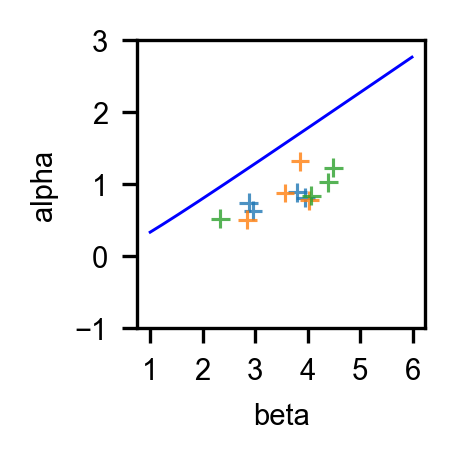

In [4]:
# Plot the relationship between alpha and beta
#
# alpha = [dN(in)/dt] / [dN(surf)/dt]
# beta = a / h, a is horizontal interior radius, h is surface layer thickness
#
# Relationship of the two for sphere:
# alpha = beta**2 / (2*beta + 1)
#
# Relationship of the two for oblate sphere with 3*h vertical radius:
# alpha1 = beta

fig_width, fig_height = 1.2, 1.2
fig = plt.figure(figsize=(fig_width, fig_height), dpi=300)
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])

# plot boundary conditions for uniform spherical expansion
#
beta = np.arange(1, 6, 0.01)
alpha = (beta*beta) / (2*beta + 1)
# ax.plot(beta, alpha, lw=.7, color=(0.16, 0.67, 0.886))
ax.plot(beta, alpha, lw=.7, color='b')

sns.scatterplot(x='beta', y='alpha', hue='filename', marker='+', s=20, data=df, alpha=.8, legend=False)

ax.set_xticks(np.arange(1, 6.1, 1))
ax.set_yticks(np.arange(-1, 3.5, 1))

# The following removes excessive clipping to facilitate detailing of line widths and colors etc in illustrator
for o in fig.findobj():
    o.set_clip_on(False)
for o in ax.findobj():
    o.set_clip_on(False)

plt.savefig('../jupyter_figures/alpha-beta-relationship-plus-pHH3.svg')
